*Case Description*

You were hired as a data scientist in an important mutual fund firm in the department of financial analysis. The firm has been doing financial analysis and financial forecast for several years. You were hired to come up with alternative approaches to do descriptive analytics in order to find better future alternatives for forecasting methods.

You have to analyze historical quarterly financial statements of all US public firms listed in the New York Exchange and NASDAQ. You will receive this dataset in a .csv format.

What will be done in this document will be an in-depth analysis of the historical financial data of companies in the United States in order to find better future alternatives for forecasting methods.

The first thing that will be done is to understand what type of variables we have and which ones we would need to carry out said analysis.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 25)


We will start by reading the CSV file that contains all the information.

In [181]:
# merge the 2 csv files and then make a list of dataframes that contains the data of each firm.

df = pd.read_csv("./doc.csv")
df_additional = pd.read_csv("./usfirms2022.csv", usecols=["Ticker", "Sector NAICS\nlevel 1", "Name"])
df = df.join(df_additional.set_index("Ticker"), on="firm") # merge the 2 Dataframes


In [182]:
df

firm       q    revenue       cogs          sgae  otheropexp  \
0          A  2000q1        NaN        NaN           NaN         NaN   
1          A  2000q2  2485000.0  1261000.0  1.010000e+06         0.0   
2          A  2000q3  2670000.0  1369000.0  1.091000e+06         0.0   
3          A  2000q4  3372000.0  1732000.0  1.182000e+06         0.0   
4          A  2001q1  2841000.0  1449000.0  1.113000e+06         0.0   
...      ...     ...        ...        ...           ...         ...   
324442  ZYNE  2021q3        0.0        0.0  1.021065e+04         0.0   
324443  ZYNE  2021q4        0.0        0.0  8.836436e+03         0.0   
324444  ZYNE  2022q1        0.0        0.0  8.903915e+03         0.0   
324445  ZYNE  2022q2        0.0        0.0  9.168770e+03         0.0   
324446   NaN     NaN        NaN        NaN           NaN         NaN   

         extraincome  finexp  incometax  totalassets  ...  longdebt  \
0                NaN     NaN        NaN          NaN  ...       NaN   
1       42000.000000   0.000    90000.0  7321000.000  ...     0.000   
2       28000.000000   0.000    83000.0  7827000.000  ...     0.000   
3       10000.000000   0.000   163000.0  8425000.000  ...     0.000   
4       -6000.000000   0.000   119000.0  9208000.000  ...     0.000   
...              ...     ...        ...          ...  ...       ...   
324442   -376.636750  -5.038        0.0    89996.170  ...   411.237   
324443     16.937906  -4.433        0.0    81171.507  ...   353.694   
324444    317.252110 -96.044        0.0    74381.029  ...   295.754   
324445   -775.927860 -91.691        0.0    67006.959  ...   237.414   
324446           NaN     NaN        NaN          NaN  ...       NaN   

        stockholderequity   adjprice  originalprice  sharesoutstanding  \
0                     NaN  63.761670       104.0000         452000.000   
1             4642000.000  45.215607        73.7500         452271.967   
2             4902000.000  30.003238        48.9375         453014.579   
3             5265000.000  33.566841        54.7500         456366.381   
4             5541000.000  18.840347        30.7300         456769.737   
...                   ...        ...            ...                ...   
324442          78686.999   4.240000         4.2400          41251.537   
324443          70913.334   2.880000         2.8800          41217.537   
324444          65166.970   2.050000         2.0500          42447.037   
324445          57241.873   1.140000         1.1400          43595.959   
324446                NaN        NaN            NaN                NaN   

        fiscalmonth    year  cto                          Name  \
0               NaN  2000.0  1.0     Agilent Technologies, Inc   
1               6.0  2000.0  2.0     Agilent Technologies, Inc   
2               9.0  2000.0  3.0     Agilent Technologies, Inc   
3              12.0  2000.0  4.0     Agilent Technologies, Inc   
4               3.0  2001.0  1.0     Agilent Technologies, Inc   
...             ...     ...  ...                           ...   
324442          9.0  2021.0  3.0  Zynerba Pharmaceuticals, Inc   
324443         12.0  2021.0  4.0  Zynerba Pharmaceuticals, Inc   
324444          3.0  2022.0  1.0  Zynerba Pharmaceuticals, Inc   
324445          6.0  2022.0  2.0  Zynerba Pharmaceuticals, Inc   
324446          NaN     NaN  NaN                           NaN   

        Sector NAICS\nlevel 1  
0               Manufacturing  
1               Manufacturing  
2               Manufacturing  
3               Manufacturing  
4               Manufacturing  
...                       ...  
324442          Manufacturing  
324443          Manufacturing  
324444          Manufacturing  
324445          Manufacturing  
324446                    NaN  

[324447 rows x 22 columns]

When analyzing the variables contained in the file, we can realize that it contains valuable information for each quarter of the year, such as revenue, expenses, which sector the company belongs to, etc.

Despite having this valuable information, we can obtain even more information from the variables provided in order to carry out an analysis based on firm size measures and profit margin measures.

What was done next was the calculation of some variables necessary for the analysis such as market value, book value, profit margin, etc.

In [183]:
df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df['lrevenue'] = df.groupby(['firm'])['revenue'].shift(4)
df['r'] = np.log(df['adjprice'].astype(float)) - np.log(df['lprice'].astype(float))
df['r2'] = np.log(df['adjprice'].astype(float)) - np.log(df.groupby(['firm'])['adjprice'].shift(4).astype(float))
df.loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]
df['book_value'] = (df['totalassets'] - df['totalliabilities']  )
df['market_value'] = (df['stockholderequity'] * df['originalprice'] )
x = (df['originalprice'] * df['sharesoutstanding'] )
df['operating_profit'] = (df['revenue'] - df['cogs'] - df['sgae'])
df['ebit'] = (df['revenue'] - df['cogs'] - df['sgae'] - df['otheropexp'])

In [184]:
# now what we want to do is group by firms, so we make a for loop that make a list of dataframes, so that for each firm store all the values of each firm on a dataframe for better handling.
merged = [y for _, y in df.groupby('firm', as_index=False)]
merged

[   firm       q    revenue       cogs       sgae  otheropexp  extraincome  \
 0     A  2000q1        NaN        NaN        NaN         NaN          NaN   
 1     A  2000q2  2485000.0  1261000.0  1010000.0         0.0      42000.0   
 2     A  2000q3  2670000.0  1369000.0  1091000.0         0.0      28000.0   
 3     A  2000q4  3372000.0  1732000.0  1182000.0         0.0      10000.0   
 4     A  2001q1  2841000.0  1449000.0  1113000.0         0.0      -6000.0   
 ..  ...     ...        ...        ...        ...         ...          ...   
 85    A  2021q2  1525000.0   708000.0   529000.0         0.0       4000.0   
 86    A  2021q3  1586000.0   734000.0   516000.0         0.0      12000.0   
 87    A  2021q4  1660000.0   760000.0   505000.0         0.0      73000.0   
 88    A  2022q1  1674000.0   764000.0   534000.0         0.0     -37000.0   
 89    A  2022q2  1607000.0   746000.0   501000.0         0.0      -7000.0   
 
      finexp  incometax  totalassets  ...                     

Once the values necessary to carry out the analysis were calculated, it was decided to do the same based on the rolling year for each firm, so the data was calculated.

Keep in mind that when calculating the rolling year, it has to be calculated in a certain way, since there are some variables that have to be added and others have to take the last value of the quarter to be able to make these calculations correctly.

In [185]:

# We want to make the analisis of the rolling year, so we collapse the last 4 values of the firm.
collapsed_dataframes = pd.DataFrame()
for i in range(len(merged)): 
    df = merged[i].tail(4) # get the last 4 values of the firm.

    dummy = merged[i].tail(1) # get the last value of the firm so we can extract some values.
    
    # temporaly store some values to then added to the final dataframe.
    totalassets = list(dummy['totalassets'])[0]
    totalliabilities = list(dummy['totalliabilities'])[0]
    shortdebt = list(dummy['shortdebt'])[0]
    longdebt = list(dummy['longdebt'])[0]
    stockholderequity = list(dummy['stockholderequity'])[0]
    adjprice = list(dummy['adjprice'])[0]
    originalprice = list(dummy['originalprice'])[0]
    book_value = list(dummy['book_value'])[0]
    market_value = list(dummy['market_value'])[0]
    operating_profit = list(dummy['operating_profit'])[0]
    ebit = list(dummy['ebit'])[0]
    operating_profit_margin = list((dummy["revenue"] - dummy["cogs"] - dummy["sgae"] - dummy["otheropexp"]) / dummy["revenue"] )[0]
    sharesoutstanding = list(dummy['sharesoutstanding'])[0]
    naics = list(dummy['Sector NAICS\nlevel 1'])[0]
    Name = list(dummy['Name'])[0]

    # collapse the last 4 values of the firm.
    newDf = df.groupby('firm', as_index=False).agg({'revenue':'sum', 'cogs':'sum', 'cogs':'sum', 'sgae':'sum', 'otheropexp':'sum', 'extraincome':'sum', 'finexp':'sum', 'incometax': 'sum'}) 

    # add the stored values to the new dataframe of the firm.
    newDf['totalassets'] = totalassets
    newDf['totalliabilities'] = totalliabilities
    newDf['shortdebt'] = shortdebt
    newDf['longdebt'] = longdebt
    newDf['stockholderequity'] = stockholderequity
    newDf['adjprice'] = adjprice
    newDf['originalprice'] = originalprice
    newDf['sharesoutstanding'] = sharesoutstanding
    newDf['book_value'] = book_value
    newDf['market_value'] = market_value
    newDf['operating_profit'] = operating_profit
    newDf['operating_profit_margin'] = operating_profit_margin
    newDf['ebit'] = ebit
    newDf['Sector NAICS\nlevel 1'] = naics
    newDf['Name'] = Name

    merged[i] = newDf # replace the new firm df on the index of the list of all firms dataframes.
    collapsed_dataframes = pd.concat([collapsed_dataframes, newDf])
    

This was the grouping of the information of each company by rolling year.

In [186]:
collapsed_dataframes # print the final dataframe to visualize better.

firm     revenue       cogs          sgae  otheropexp    extraincome  \
0      A   6527000.0  3004000.0  2.056000e+06         0.0   41000.000000   
0     AA  13386000.0  9653000.0  8.930000e+05   1138000.0  271000.000000   
0   AAIC     31855.0    15523.0  0.000000e+00         0.0  -10809.000000   
0    AAL  40717000.0        0.0  4.160800e+07         0.0  251000.000000   
0   AAME    195299.0        0.0  1.915230e+05         0.0       0.000000   
..   ...         ...        ...           ...         ...            ...   
0   ZVIA    156702.0    93921.0  8.744600e+04     94595.0   51341.000000   
0    ZVO    230001.0   149303.0  1.118000e+05      5753.0   -3980.000000   
0    ZWS    340300.0   195100.0  1.196000e+05      3400.0   50400.000000   
0     ZY     14546.0    48949.0  2.327660e+05     69138.0   -2028.000000   
0   ZYNE         0.0        0.0  3.711977e+04         0.0    -818.374594   

         finexp  incometax   totalassets  totalliabilities  ...    adjprice  \
0     81000.000   164000.0  1.045500e+07      5.333000e+06  ...  118.560000   
0    141000.000   869000.0  1.570900e+07      8.417000e+06  ...   45.487956   
0         0.000     4333.0  1.084755e+06      8.710570e+05  ...    3.250000   
0   1828000.000  -546000.0  6.796300e+07      7.638500e+07  ...   12.680000   
0         0.000      863.0  3.792740e+05      2.701730e+05  ...    2.670000   
..          ...        ...           ...               ...  ...         ...   
0         0.000       55.0  1.127380e+05      2.553900e+04  ...    2.810000   
0         0.000       98.0  8.543300e+04      7.882800e+04  ...    0.970100   
0     22000.000   -13700.0  1.176300e+06      9.469000e+05  ...   27.179735   
0     26572.000       44.0  4.709680e+05      2.343450e+05  ...    1.230000   
0      -197.206        0.0  6.700696e+04      9.765086e+03  ...    1.140000   

    originalprice  sharesoutstanding   book_value  market_value  \
0        118.7700         298708.056  5122000.000  6.083399e+08   
0         45.5800         184448.686  7292000.000  3.323694e+08   
0          3.2500          35016.392   213698.000  6.945185e+05   
0         12.6800         649514.848 -8422000.000 -1.067910e+08   
0          2.6700          20398.497   109101.000  2.912997e+05   
..            ...                ...          ...           ...   
0          2.8100          67209.461    87199.000  2.450292e+05   
0          0.9701          34095.968     6605.000  6.407510e+03   
0         27.2400         125967.533   229400.000  6.248856e+06   
0          1.2300         103140.755   236623.000  2.910463e+05   
0          1.1400          43595.959    57241.873  6.525574e+04   

    operating_profit  operating_profit_margin          ebit  \
0       3.600000e+05                 0.224020  3.600000e+05   
0       6.570000e+05                 0.200878  7.320000e+05   
0       4.526000e+03                 0.415229  4.526000e+03   
0       1.017000e+06                 0.075771  1.017000e+06   
0      -2.115000e+03                -0.047348 -2.115000e+03   
..               ...                      ...           ...   
0      -6.700000e+03                -0.323723 -1.474300e+04   
0      -9.723000e+03                -0.016368 -8.410000e+02   
0       5.380000e+04                 0.188248  5.350000e+04   
0      -6.573600e+04               -40.317388 -1.061960e+05   
0      -9.168770e+03                     -inf -9.168770e+03   

                               Sector NAICS\nlevel 1  \
0                                      Manufacturing   
0                                      Manufacturing   
0                              Finance and Insurance   
0                     Transportation and Warehousing   
0                              Finance and Insurance   
..                                               ...   
0                                      Manufacturing   
0                               Educational Services   
0                                      Manufacturing   
0   Professional, Sc

What is the composition of US public firms in terms of size, sales performance and profitability?

- We can see from the information from below that the industry that have the highest market value is "Professional, Scientific, and Technical Services" and the lower is "Other Services (except Public Administration)".

- For the sales we can see that the firm that have the highest sales is Manufacturing, while the lowest is also "Other Services (except Public Administration)".

- For the profitability we can see that the firm that have the highest profitability is "Manufacturing" and the lowest is "Educational Services".

In [187]:
# getting the size of the firms 

df = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['market_value'].agg('sum')).reset_index()
df.sort_values(by='market_value',ascending=False)



Sector NAICS\nlevel 1  market_value
13   Professional, Scientific, and Technical Services  5.865228e+11
10                                      Manufacturing  3.981850e+11
7                               Finance and Insurance  3.954408e+11
9                                         Information  1.170476e+11
2   Administrative and Support and Waste Managemen...  5.035049e+10
15                                       Retail Trade  4.815839e+10
17                                          Utilities  4.051487e+10
18                                    Wholesale Trade  2.468218e+10
11      Mining, Quarrying, and Oil and Gas Extraction  2.256180e+10
16                     Transportation and Warehousing  2.107575e+10
5                                        Construction  1.881597e+10
14                 Real Estate and Rental and Leasing  1.185844e+10
4                 Arts, Entertainment, and Recreation  9.672710e+09
8                   Health Care and Social Assistance  5.918392e+09
3          Agriculture, Forestry, Fishing and Hunting  3.316995e+09
6                                Educational Services  2.757596e+09
1                     Accommodation and Food Services  1.857415e+09
12      Other Services (except Public Administration)  5.762591e+08
0                                                   -  7.033582e+07

In [188]:
# getting the sales of the firms 

df = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['sgae'].agg('sum')).reset_index()
df.sort_values(by='sgae',ascending=False)


Sector NAICS\nlevel 1          sgae
10                                      Manufacturing  1.330282e+09
7                               Finance and Insurance  9.582542e+08
15                                       Retail Trade  6.568706e+08
9                                         Information  5.352208e+08
16                     Transportation and Warehousing  4.504458e+08
13   Professional, Scientific, and Technical Services  2.335517e+08
17                                          Utilities  1.970826e+08
2   Administrative and Support and Waste Managemen...  1.745880e+08
8                   Health Care and Social Assistance  1.240082e+08
18                                    Wholesale Trade  1.001111e+08
4                 Arts, Entertainment, and Recreation  9.046662e+07
1                     Accommodation and Food Services  8.342076e+07
11      Mining, Quarrying, and Oil and Gas Extraction  7.907465e+07
14                 Real Estate and Rental and Leasing  7.887238e+07
5                                        Construction  1.978986e+07
3          Agriculture, Forestry, Fishing and Hunting  1.353913e+07
6                                Educational Services  6.029620e+06
12      Other Services (except Public Administration)  6.018321e+06
0                                                   -  5.673480e+05

In [189]:
# getting the profitability of the firms 

df = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['ebit'].agg('sum')).reset_index()
df.sort_values(by='ebit',ascending=False)

Sector NAICS\nlevel 1          ebit
10                                      Manufacturing  2.662130e+08
7                               Finance and Insurance  1.716760e+08
9                                         Information  5.164214e+07
11      Mining, Quarrying, and Oil and Gas Extraction  4.406719e+07
15                                       Retail Trade  4.110833e+07
13   Professional, Scientific, and Technical Services  3.065421e+07
16                     Transportation and Warehousing  2.030547e+07
2   Administrative and Support and Waste Managemen...  1.909772e+07
17                                          Utilities  1.544359e+07
1                     Accommodation and Food Services  1.111095e+07
18                                    Wholesale Trade  1.045879e+07
5                                        Construction  9.855623e+06
14                 Real Estate and Rental and Leasing  7.586160e+06
4                 Arts, Entertainment, and Recreation  4.404016e+06
3          Agriculture, Forestry, Fishing and Hunting  3.251190e+06
12      Other Services (except Public Administration)  5.635980e+05
6                                Educational Services  1.861960e+05
0                                                   -  1.267100e+05
8                   Health Care and Social Assistance -1.527342e+06

Why some firms are more profitable than others? Which factors/variables are related to profitability?

- The definition of profitability is the extent to which its total income exceeds its total expenses for any given period. 

- To calculate the profitability of a company we can take the next formula: Total Revenue - Total Expenses

- So the things that can affect the profitability of a company can be the number of production units, production per unit, direct and indirect costs, etc.

Show how many firms by industry there are in the sample 

 - We can see that the sector that has more firms is the Manufacturing sector with 1565 firms, and the one with the least is Educational services with 14 firms.

 - Also we can see an increment of firms pass by the information industry.
 - Below information industry all the industries stay below 200.

Sector NAICS\nlevel 1  # firms
0                                       Manufacturing     1565
1                               Finance and Insurance      701
2                                         Information      261
3                                        Retail Trade      152
4    Professional, Scientific, and Technical Services      145
5   Administrative and Support and Waste Managemen...      133
6       Mining, Quarrying, and Oil and Gas Extraction      103
7                                     Wholesale Trade       79
8                                           Utilities       77
9                     Accommodation and Food Services       69
10                     Transportation and Warehousing       69
11                 Real Estate and Rental and Leasing       68
12                  Health Care and Social Assistance       64
13                                       Construction       45
14                Arts, Entertainment, and Recreation       21
15      Other Services (except Public Administration)       16
16         Agriculture, Forestry, Fishing and Hunting       16
17                               Educational Services       14
18                                                  -        2

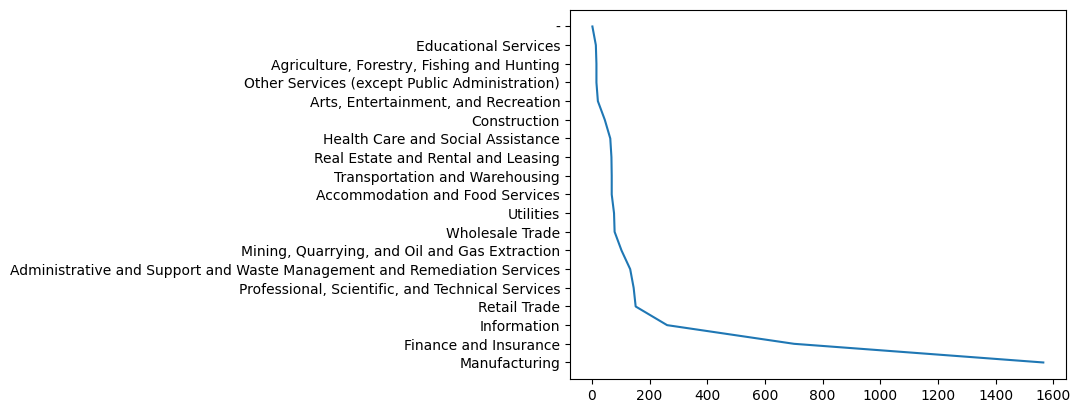

In [190]:
firms_by_industry = collapsed_dataframes.groupby('Sector NAICS\nlevel 1') # group all the firms by sector
firms_by_industry = pd.DataFrame(firms_by_industry['Sector NAICS\nlevel 1'].count().sort_values(ascending=False)) # count all the firms on each sector
firms_by_industry = firms_by_industry.rename(columns={"Sector NAICS\nlevel 1": "# firms"}) 
firms_by_industry = firms_by_industry.reset_index()
plt.plot(firms_by_industry['# firms'], firms_by_industry['Sector NAICS\nlevel 1'])
firms_by_industry


For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?


- The thing that we see based on the graph is that the market value and book value doesn't differ a lot in some of the industries, in fact we can see the 2 lines somehow converge and have the same "structure" and stay for almost all of the firms.

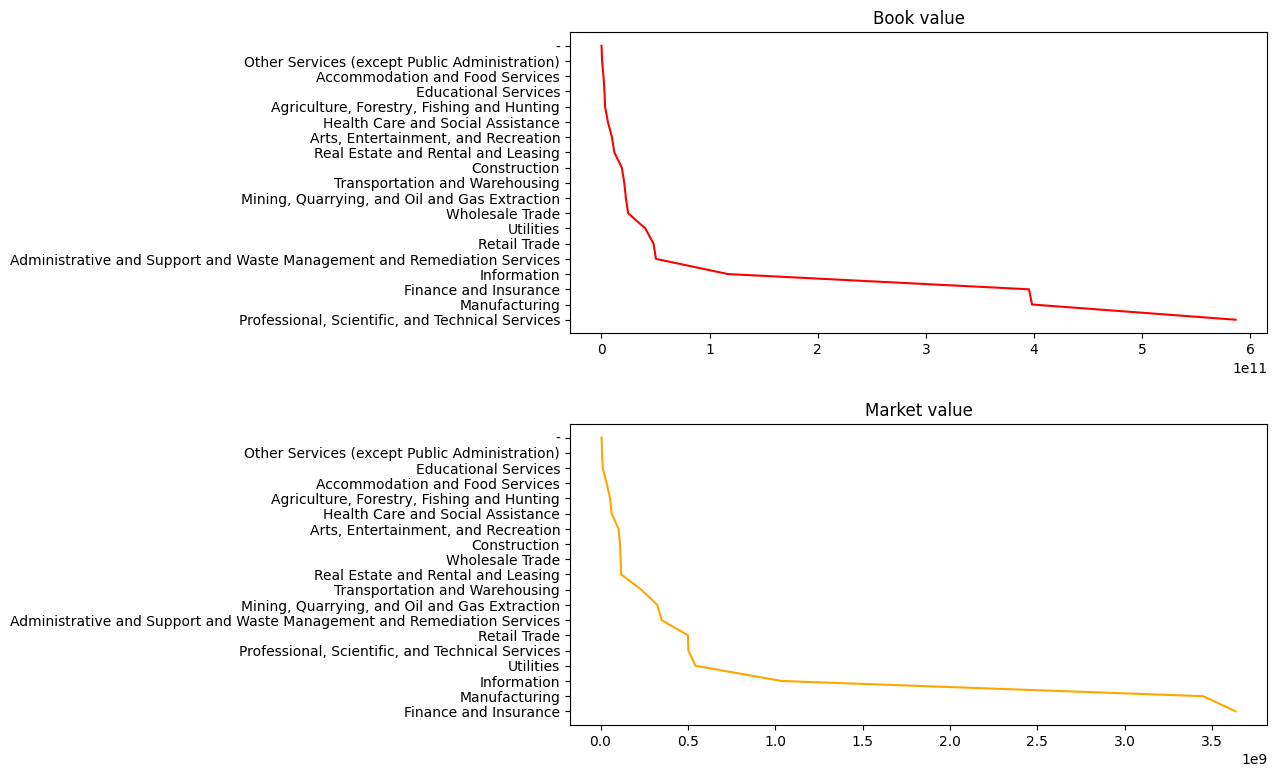

In [191]:


industries_market_value = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['market_value'].agg('sum'))
industries_book_value = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['book_value'].agg('sum'))

industries_market_value = pd.DataFrame(industries_market_value['market_value'].sort_values(ascending=False))
industries_book_value = pd.DataFrame(industries_book_value['book_value'].sort_values(ascending=False))

industries_market_value = industries_market_value.reset_index()
industries_book_value = industries_book_value.reset_index()


x = industries_market_value['Sector NAICS\nlevel 1']
y = industries_market_value['market_value']

x2 = industries_book_value['Sector NAICS\nlevel 1']
y2 = industries_book_value['book_value']


fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(9, 9)
ax1.plot(y,x, color="red")
ax1.set_title('Book value')
ax2.plot(y2,x2,color ='orange')
ax2.set_title('Market value')
fig.subplots_adjust(hspace=.3)



industries_market_value['book_value'] = industries_book_value['book_value'] # merge book value and market value on 1 dataframe



For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

- We can see that there are only 2 industries that have a profit margin more than 1.0 which are "Accommodation and Food Services" and "Construction" with 6.9 and 4.6 respectively.

- Also we can see that there are a lot of industries with a profit margin between 0 and 1. 

- There is a industry with a profit margin of -13.578666. 

Sector NAICS\nlevel 1  operating_profit_margin
0                     Accommodation and Food Services                 6.948798
1                                        Construction                 4.681278
2                                     Wholesale Trade                 0.968937
3                 Arts, Entertainment, and Recreation                 0.731669
4                      Transportation and Warehousing                 0.688176
5       Other Services (except Public Administration)                 0.606959
6                                                   -                 0.463653
7                                Educational Services                -0.023139
8          Agriculture, Forestry, Fishing and Hunting                -0.250904
9                                        Retail Trade                -0.951040
10  Administrative and Support and Waste Managemen...               -13.578666
11                              Finance and Insurance                      NaN
12                  Health Care and Social Assistance                      NaN
13                                        Information                      NaN
14                                      Manufacturing                      NaN
15      Mining, Quarrying, and Oil and Gas Extraction                      NaN
16   Professional, Scientific, and Technical Services                      NaN
17                 Real Estate and Rental and Leasing                      NaN
18                                          Utilities                      NaN

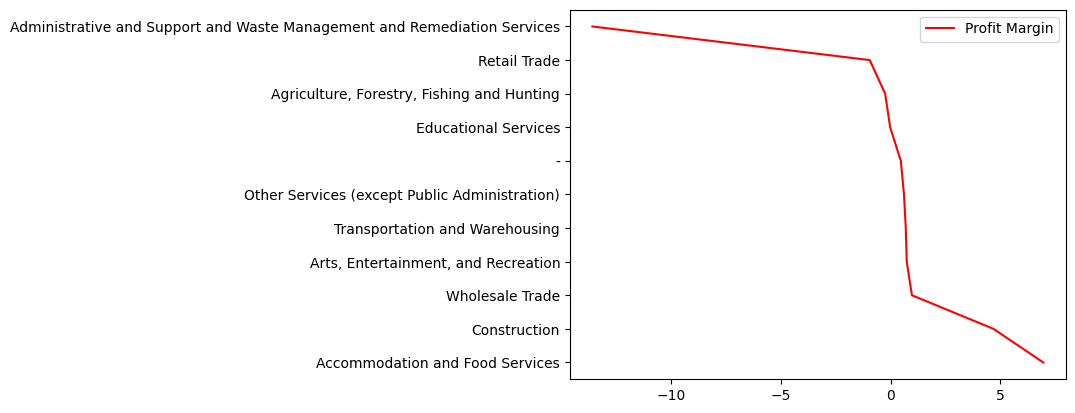

In [192]:
industries_profit_margin = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['operating_profit_margin'].agg('sum'))
industries_profit_margin = pd.DataFrame(industries_profit_margin['operating_profit_margin'].sort_values(ascending=False))
industries_profit_margin = industries_profit_margin.reset_index()

x = industries_profit_margin['Sector NAICS\nlevel 1']
y = industries_profit_margin['operating_profit_margin']

plt.plot(y,x, color="red")
plt.legend(['Profit Margin'])
industries_profit_margin

Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

- Based on the comparison of the market value of each firm vs the mean of the market value of a US firm on the next dataframe we can see that half of this 10 firms are above the size, and the other half are under the typical size. 

In [193]:
typical_size_of_USFirm = collapsed_dataframes["market_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_market_value = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['market_value'].agg('sum'))
biggest_firms_market_value = pd.DataFrame(biggest_firms_market_value['market_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_market_value['more/less than typical size firm'] = (biggest_firms_market_value['market_value'] - typical_size_of_USFirm )
biggest_firms_market_value

Typical size of firm: 56609965320.319115


firm  market_value  more/less than typical size firm
0  BRK_A  1.886196e+14                      1.885630e+14
1  GOOGL  5.566244e+11                      5.000144e+11
2   MSFT  4.277298e+10                     -1.383698e+10
3    UNH  3.914117e+10                     -1.746879e+10
4     GS  3.501004e+10                     -2.159992e+10
5    JPM  3.222256e+10                     -2.438740e+10
6   TSLA  2.507614e+10                     -3.153382e+10
7    TMO  2.301008e+10                     -3.359988e+10
8    BLK  2.265751e+10                     -3.395246e+10
9    CVX  2.237749e+10                     -3.423248e+10

To make a more complete analysis and understand the why these numbers of these firms we could see to which industry they belong as in the following table:

- Here i don't know why it doesn't appear the first firm wich is BRK_A, but we can see that the industry that repeats the most is Finance and Insurance with 4 ocurrences, and the industry that follows is Manufacturing with 3 ocurrences. 

- With this information we can see that the industry that have more firms that are on the top 10 of market value is Finance and Insurance. 

- Also we can see that the industries that have less firms that are on the top 10 of market value are Finance and Insurance, Mining, Quarrying, and Oil and Gas Extraction and Information. 

Typical size of firm: 56609965320.319115


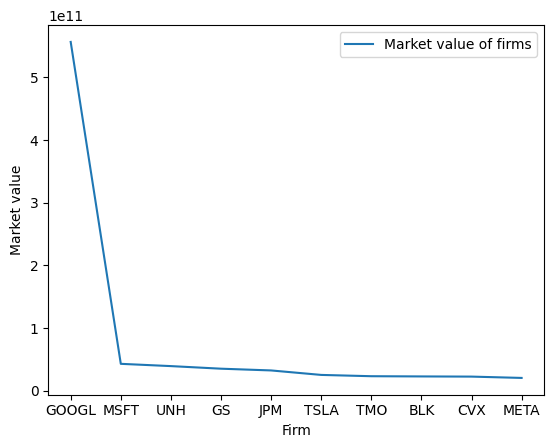

In [194]:
typical_size_of_USFirm = collapsed_dataframes["market_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_market_value = pd.DataFrame(collapsed_dataframes.groupby(['firm', 'Sector NAICS\nlevel 1'])['market_value'].agg('sum'))
biggest_firms_market_value = pd.DataFrame(biggest_firms_market_value['market_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_market_value['more/less than typical size firm'] = (biggest_firms_market_value['market_value'] - typical_size_of_USFirm )
biggest_firms_market_value
plt.plot(biggest_firms_market_value['firm'], biggest_firms_market_value['market_value'])
plt.ylabel('Market value')
plt.xlabel('Firm')
plt.legend(['Market value of firms'])

Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

- Following the same process with the question above, we can see that all the firms are above the size of the typical firms of the US. 

In [195]:
typical_size_of_USFirm = collapsed_dataframes["book_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_book_value = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['book_value'].agg('sum'))
biggest_firms_book_value = pd.DataFrame(biggest_firms_book_value['book_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_book_value['more/less than typical size firm'] = (biggest_firms_book_value['book_value'] - typical_size_of_USFirm )
biggest_firms_book_value

Typical size of firm: 3465162.6027016034


firm   book_value  more/less than typical size firm
0  BRK_A  461229000.0                      4.577638e+08
1    JPM  286143000.0                      2.826778e+08
2    BAC  269118000.0                      2.656528e+08
3  GOOGL  255419000.0                      2.519538e+08
4      C  199626000.0                      1.961608e+08
5    XOM  184508000.0                      1.810428e+08
6    WFC  179793000.0                      1.763278e+08
7   MSFT  166542000.0                      1.630768e+08
8    CVX  154562000.0                      1.510968e+08
9      T  135307000.0                      1.318418e+08

With the information below, we can see that the industry that repeats the most is also Finance and Insurance with also 4 ocurrences.

The least repeated industry is "Professional, Scientific, and Technical Services" and "Retail Trade	" with 1 ocurrence each.

Typical size of firm: 3465162.6027016034


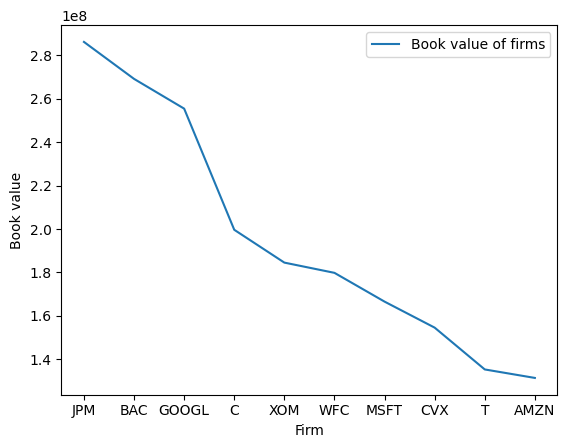

In [196]:
typical_size_of_USFirm = collapsed_dataframes["book_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_book_value = pd.DataFrame(collapsed_dataframes.groupby(['firm', 'Sector NAICS\nlevel 1'])['book_value'].agg('sum'))
biggest_firms_book_value = pd.DataFrame(biggest_firms_book_value['book_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_book_value['more/less than typical size firm'] = (biggest_firms_book_value['book_value'] - typical_size_of_USFirm )
biggest_firms_book_value
plt.plot(biggest_firms_book_value['firm'], biggest_firms_book_value['book_value'])

plt.ylabel('Book value')
plt.xlabel('Firm')
plt.legend(['Book value of firms'])

To abstract this 2 plots, we plotted the market value and book value side by side getting the following plot.

- We can see that the book value is gradually declining, while the market value has a sudden drop with the 3rd firm and stays like that for the rest of firms.

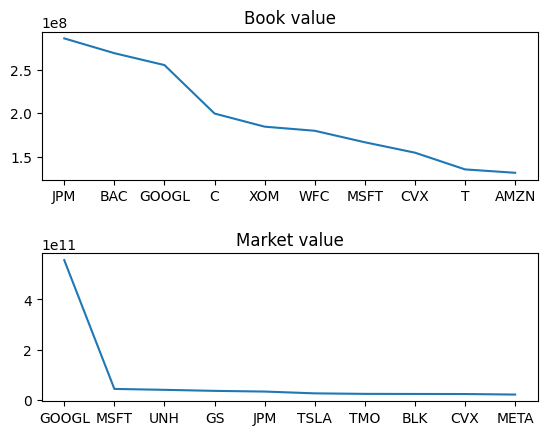

In [197]:


fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(biggest_firms_book_value['firm'], biggest_firms_book_value['book_value'])
ax1.set_title('Book value')
ax2.plot(biggest_firms_market_value['firm'], biggest_firms_market_value['market_value'])
ax2.set_title('Market value')
fig.subplots_adjust(hspace=.5)

2.2.1.2 Considering the whole history of financial data for all firms

How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

In [198]:
df = pd.read_csv("./doc.csv")
df_additional = pd.read_csv("./usfirms2022.csv", usecols=["Ticker", "Sector NAICS\nlevel 1", "Name"])
df = df.join(df_additional.set_index("Ticker"), on="firm")

df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df['lrevenue'] = df.groupby(['firm'])['revenue'].shift(4)
df['r'] = np.log(df['adjprice'].astype(float)) - np.log(df['lprice'].astype(float))
df['r2'] = np.log(df['adjprice'].astype(float)) - np.log(df.groupby(['firm'])['adjprice'].shift(4).astype(float))
df.loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]
df['book_value'] = (df['totalassets'] - df['totalliabilities']  )
df['market_value'] = (df['stockholderequity'] * df['originalprice'] )
df['operating_profit'] = (df['revenue'] - df['cogs'] - df['sgae'])
df['ebit'] = (df['revenue'] - df['cogs'] - df['sgae'] - df['otheropexp'])
df['lebit'] = df.groupby(['firm'])['ebit'].shift(4)
df['operating_profit_margin'] =  ( df['ebit'] / df['revenue'] )
df

historical_info = df # print the final dataframe to visualize better.



Calculate and explain earnings per share deflated by price.

- The formula to calculate the EPS is first getting the net income and then divide this net income by the shareoutstanding of the row.

In [199]:
historical_info['net income'] = (historical_info['revenue'] - historical_info['cogs'] - historical_info['sgae'] - historical_info['otheropexp'] -historical_info['incometax'] - historical_info['finexp'] - historical_info['extraincome'])
historical_info["earnings per share"] = (historical_info["net income"] / historical_info["sharesoutstanding"]) / historical_info["originalprice"]
historical_info

firm       q    revenue       cogs          sgae  otheropexp  \
0          A  2000q1        NaN        NaN           NaN         NaN   
1          A  2000q2  2485000.0  1261000.0  1.010000e+06         0.0   
2          A  2000q3  2670000.0  1369000.0  1.091000e+06         0.0   
3          A  2000q4  3372000.0  1732000.0  1.182000e+06         0.0   
4          A  2001q1  2841000.0  1449000.0  1.113000e+06         0.0   
...      ...     ...        ...        ...           ...         ...   
324442  ZYNE  2021q3        0.0        0.0  1.021065e+04         0.0   
324443  ZYNE  2021q4        0.0        0.0  8.836436e+03         0.0   
324444  ZYNE  2022q1        0.0        0.0  8.903915e+03         0.0   
324445  ZYNE  2022q2        0.0        0.0  9.168770e+03         0.0   
324446   NaN     NaN        NaN        NaN           NaN         NaN   

         extraincome  finexp  incometax  totalassets  ...         r        r2  \
0                NaN     NaN        NaN          NaN  ...       NaN       NaN   
1       42000.000000   0.000    90000.0  7321000.000  ...       NaN       NaN   
2       28000.000000   0.000    83000.0  7827000.000  ...       NaN       NaN   
3       10000.000000   0.000   163000.0  8425000.000  ...       NaN       NaN   
4       -6000.000000   0.000   119000.0  9208000.000  ... -1.219152 -1.219152   
...              ...     ...        ...          ...  ...       ...       ...   
324442   -376.636750  -5.038        0.0    89996.170  ...  0.247615  0.247615   
324443     16.937906  -4.433        0.0    81171.507  ... -0.136132 -0.136132   
324444    317.252110 -96.044        0.0    74381.029  ... -0.819027 -0.819027   
324445   -775.927860 -91.691        0.0    67006.959  ... -1.534790 -1.534790   
324446           NaN     NaN        NaN          NaN  ...       NaN       NaN   

         book_value  market_value  operating_profit         ebit       lebit  \
0               NaN           NaN               NaN          NaN         NaN   
1       4642000.000  3.423475e+08       214000.0000  214000.0000         NaN   
2       4902000.000  2.398916e+08       210000.0000  210000.0000         NaN   
3       5265000.000  2.882588e+08       458000.0000  458000.0000         NaN   
4       5541000.000  1.702749e+08       279000.0000  279000.0000         NaN   
...             ...           ...               ...          ...         ...   
324442    78686.999  3.336329e+05       -10210.6520  -10210.6520  -9231.7793   
324443    70913.334  2.042304e+05        -8836.4365   -8836.4365 -10189.5260   
324444    65166.970  1.335923e+05        -8903.9150   -8903.9150  -7884.8071   
324445    57241.873  6.525574e+04        -9168.7695   -9168.7695  -9838.4941   
324446          NaN           NaN               NaN          NaN         NaN   

        operating_profit_margin     net income  earnings per share  
0                           NaN            NaN                 NaN  
1                      0.086117   82000.000000            0.002458  
2                      0.078652   99000.000000            0.004466  
3                      0.135824  285000.000000            0.011406  
4                      0.098205  166000.000000            0.011826  
...                         ...            ...                 ...  
324442                     -inf   -9828.977250           -0.056196  
324443                     -inf   -8848.941406           -0.074545  
324444                     -inf   -9125.123110           -0.104867  
324445                     -inf   -8301.150640           -0.167027  
324446                      NaN            NaN                 NaN  

[324447 rows x 34 columns]

We can see with the dataframe below, that there are a lot of eps that have a value approximately of 4.3e+04.
Also we can see that the max value of a eps is 4.54e+08 and the minimum value, which is a negative one, have a value of -7.58e+08. This means that this company maybe doesn't have a very much market value.

In [200]:
pd.DataFrame(historical_info['earnings per share'].describe())

earnings per share
count       152191.000000
mean            -2.967985
std           1260.594684
min        -490234.791889
25%             -0.005336
50%              0.009445
75%              0.020794
max          38825.214900



Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

- First we group the 2 industries that belong to me, in this case there are 2: Retail and Wholesale trade.
- After we have the data grouped in 1 only dataframe we calculate the R quarterly by calculating it annually.

In [201]:
# Getting the info of the 2 industries
only_industry_retail = historical_info.loc[historical_info['Sector NAICS\nlevel 1'] == 'Retail Trade']
only_industry_wholesale = historical_info.loc[historical_info['Sector NAICS\nlevel 1'] == 'Wholesale Trade']
only_industry = pd.concat([only_industry_retail, only_industry_wholesale]) # merging into 1 only DF
only_industry['R'] = np.log(only_industry['adjprice']) - np.log(only_industry['adjprice'].shift(4)) # calculating r


Here what we want to do is scale the data of the dates to be able to transform them and have a scale between each quarter of whether the company is classified as small, medium or large.

- The first thing that was done was to group by quarters to later change the format of the column of the quarters by real dates to later make the division by 3 quartiles and that would generate the division of the size of the companies.

In [202]:

# group by quarter
only_industry['date'] = pd.to_datetime(only_industry['q'])
#only_industry = only_industry.reset_index()
# create a copy to use later
copy = only_industry[['firm','Name','market_value','date']].sort_values(by='date',ascending=True)

# create 4 labels, a is a dummy label that help us to divide the companies.
cut = pd.cut(np.array(only_industry['market_value']), 3, labels=["small", "medium", "big"])
only_industry['size'] = pd.DataFrame(cut)

#only_industry = only_industry.set_index('date')
#only_industry = only_industry.dropna()
only_industry

firm       q   revenue      cogs     sgae  otheropexp  extraincome  \
630      AAP  2000q1       NaN       NaN      NaN         NaN          NaN   
631      AAP  2000q2       NaN       NaN      NaN         NaN          NaN   
632      AAP  2000q3       NaN       NaN      NaN         NaN          NaN   
633      AAP  2000q4       NaN       NaN      NaN         NaN          NaN   
634      AAP  2001q1       NaN       NaN      NaN         NaN          NaN   
...      ...     ...       ...       ...      ...         ...          ...   
322911  ZEUS  2021q2  556077.0  428704.0  84936.0         0.0          1.0   
322912  ZEUS  2021q3  668466.0  520866.0  85440.0         0.0        -15.0   
322913  ZEUS  2021q4  624586.0  497818.0  90488.0         0.0        -12.0   
322914  ZEUS  2022q1  696333.0  555107.0  88104.0         0.0         -6.0   
322915  ZEUS  2022q2  709176.0  560546.0  94765.0         0.0        -15.0   

        finexp  incometax  totalassets  ...  market_value  operating_profit  \
630        NaN        NaN          NaN  ...           NaN               NaN   
631        NaN        NaN          NaN  ...           NaN               NaN   
632        NaN        NaN          NaN  ...           NaN               NaN   
633        NaN        NaN          NaN  ...           NaN               NaN   
634        NaN        NaN          NaN  ...           NaN               NaN   
...        ...        ...          ...  ...           ...               ...   
322911  2017.0    10772.0     887689.0  ...   10398769.80           42437.0   
322912  1947.0    15665.0     971306.0  ...    9712697.40           62160.0   
322913  2013.0     9394.0    1023572.0  ...    9974316.50           36280.0   
322914  1998.0    13816.0    1043703.0  ...   17798749.56           53122.0   
322915  2271.0    13955.0    1086116.0  ...   12863644.25           53865.0   

           ebit    lebit  operating_profit_margin  net income  \
630         NaN      NaN                      NaN         NaN   
631         NaN      NaN                      NaN         NaN   
632         NaN      NaN                      NaN         NaN   
633         NaN      NaN                      NaN         NaN   
634         NaN      NaN                      NaN         NaN   
...         ...      ...                      ...         ...   
322911  42437.0  -7485.0                 0.076315     29647.0   
322912  62160.0   -363.0                 0.092989     44563.0   
322913  36280.0   5370.0                 0.058086     24885.0   
322914  53122.0  31590.0                 0.076288     37314.0   
322915  53865.0  42437.0                 0.075954     37654.0   

        earnings per share         R       date   size  
630                    NaN       NaN 2000-01-01    NaN  
631                    NaN       NaN 2000-04-01  small  
632                    NaN       NaN 2000-07-01  small  
633                    NaN       NaN 2000-10-01  small  
634                    NaN       NaN 2001-01-01  small  
...                    ...       ...        ...    ...  
322911            0.091064  0.921526 2021-04-01    NaN  
322912            0.165144  0.766481 2021-07-01    NaN  
322913            0.095595  0.570275 2021-10-01    NaN  
322914            0.087219  0.272373 2022-01-01    NaN  
322915            0.131410 -0.124839 2022-04-01    NaN  

[20790 rows x 37 columns]

Once we had the company ratings, we needed to convert these string values to numeric values so the linear regression model could read them.

For this, One Hot Encoding was used to convert these values into zeros and ones and be able to perform the transformation.

In [203]:
from sklearn import preprocessing
cols = only_industry[['size']]
a = only_industry[['size']]
print(cols)

le = preprocessing.LabelEncoder()

cols = cols.apply(le.fit_transform)
a = preprocessing.OneHotEncoder()
a.fit(cols)
one_hot_labels = a.transform(cols).toarray()
one_hot_labels


         size
630       NaN
631     small
632     small
633     small
634     small
...       ...
322911    NaN
322912    NaN
322913    NaN
322914    NaN
322915    NaN

[20790 rows x 1 columns]


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Here we are left with the dataframe of the labels converted to zeros and ones.

In [204]:
col_names = a.get_feature_names_out(list(cols.columns))
col_names = pd.DataFrame(one_hot_labels, columns = col_names)
#col_names = col_names.drop(columns=['size_0'])
col_names

size_0  size_1
0         0.0     1.0
1         1.0     0.0
2         1.0     0.0
3         1.0     0.0
4         1.0     0.0
...       ...     ...
20785     0.0     1.0
20786     0.0     1.0
20787     0.0     1.0
20788     0.0     1.0
20789     0.0     1.0

[20790 rows x 2 columns]

We perform a reset_index to have the table arranged perfectly.

In [205]:
#sample_train_data = sample_train_data.reset_index()
only_industry = only_industry.reset_index()

We join this data with the original data table.

In [206]:

sample_train_data = only_industry.drop(columns = cols.columns)
sample_train_data = only_industry.join(col_names)
only_industry = sample_train_data

Once we already had our clean and scaled dataset, we proceeded to make a heat map of the correlations of the variables.

In [207]:
corr = only_industry.corr()
corr.style.background_gradient(cmap='coolwarm')

The 3 variables that i choose was the follow ones:



- salesannualgrowth
- operatingprofitgrowth
- booktomarketratio


The next thing that was done was to take this data from the dataset to apply a winsorization since there were very high data that had a great difference with all the others. This in the future may affect the model.

Once the winsorization was carried out with the 3 variables, they were plotted in histograms to corroborate that the winsorization actually had an effect.

In [208]:
only_industry["booktomarketratio"] = only_industry["market_value"] / only_industry["book_value"]
only_industry["salesannualgrowth"] = (only_industry["revenue"] / only_industry["lrevenue"]) -1
only_industry["operatingprofitgrowth"] = only_industry["ebit"] / only_industry["lebit"]

In [209]:
annual_stock_return = only_industry['R']

opm = pd.DataFrame(only_industry['booktomarketratio'])

indexes = opm[np.isinf(opm.booktomarketratio)].index
opm = opm.drop(indexes)

largest = opm['booktomarketratio'].quantile(.88)
lowest = opm['booktomarketratio'].quantile(.1)
opm = opm.clip(lower=lowest,upper=largest)
opm = pd.DataFrame(opm)

annual_stock_return = annual_stock_return.drop(indexes)

mv = pd.DataFrame(only_industry['salesannualgrowth'])
mv = mv.drop(indexes)

largest = mv['salesannualgrowth'].quantile(.88)
lowest = mv['salesannualgrowth'].quantile(.1)
mv = pd.DataFrame(mv.clip(lowest,largest))

rev = pd.DataFrame(only_industry['operatingprofitgrowth'])
rev = rev.drop(indexes)

largest = rev['operatingprofitgrowth'].quantile(.78)
lowest = rev['operatingprofitgrowth'].quantile(.1)
rev = pd.DataFrame(rev.clip(lowest,largest))

Do histograms for each factor/variables and interpret them

At the moment of Plotting the first variable, which is "booktomarketratio" we see that the majority of the values are between 0 and 1000. Also we can see that they are 10 firms that have a book to market value of 2000 and 80 firms that have a value of 1500.

(array([1978.,  970.,  998., 1026.,  903.,  821.,  764.,  581.,  514.,
         397.,  305.,  250.,  255.,  213., 1544.]),
 array([ 6.4475    , 11.58713333, 16.72676667, 21.8664    , 27.00603333,
        32.14566667, 37.2853    , 42.42493333, 47.56456667, 52.7042    ,
        57.84383333, 62.98346667, 68.1231    , 73.26273333, 78.40236667,
        83.542     ]),
 <BarContainer object of 15 artists>)

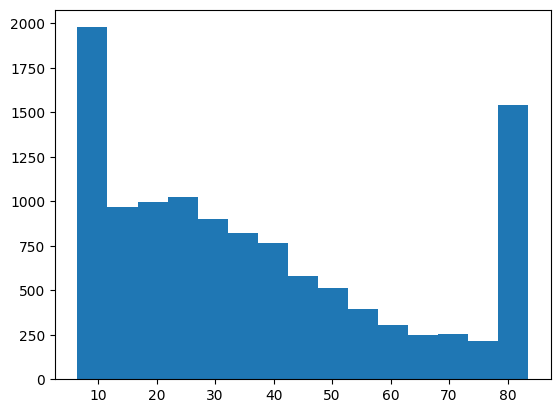

In [210]:
plt.hist(opm, bins=15 )

With the sales annual growth graph we can see a little bell effect at the middle of the plot with the values of 0.5. Also we can see that there are 2 plotted lines that are in the edges of the plot, with the values of 1200 and 1400.

(array([1299.,  354.,  481.,  617.,  823.,  976.,  944.,  896.,  762.,
         621.,  467.,  355.,  279.,  259., 1465.]),
 array([-0.09371874, -0.07054375, -0.04736875, -0.02419376, -0.00101876,
         0.02215623,  0.04533123,  0.06850622,  0.09168122,  0.11485622,
         0.13803121,  0.16120621,  0.1843812 ,  0.2075562 ,  0.23073119,
         0.25390619]),
 <BarContainer object of 15 artists>)

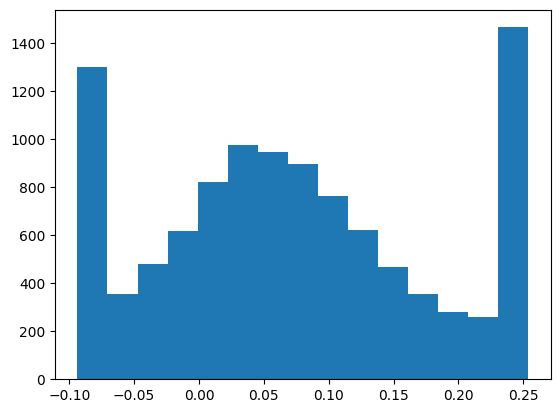

In [211]:
plt.hist(mv, bins=15)

For this last graph of operating profit growth we can see that there is a growing profit when the value rises to 3000.

(array([1191.,  166.,  169.,  218.,  306.,  422.,  621., 1052., 1667.,
        1602., 3184.]),
 array([-0.02718611,  0.09705964,  0.22130539,  0.34555114,  0.46979688,
         0.59404263,  0.71828838,  0.84253413,  0.96677988,  1.09102563,
         1.21527138,  1.33951713]),
 <BarContainer object of 11 artists>)

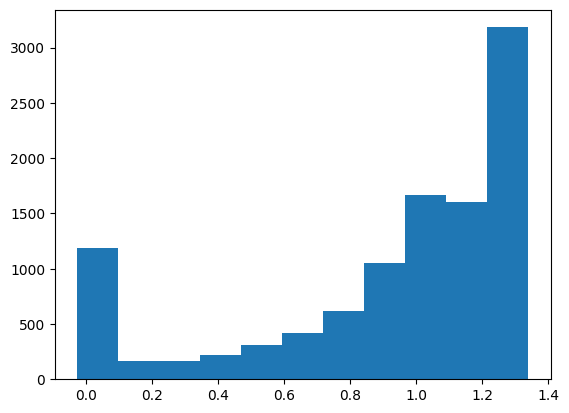

In [212]:
plt.hist(rev, bins=11)

In the following graphs in which we plot the relationship of the independent variables with the dependent variable, we can observe that the 3 graphs are too similar and have a similar shape and structure.

Do plots to visualize the possible relationship each factor might have with the dependent variable.

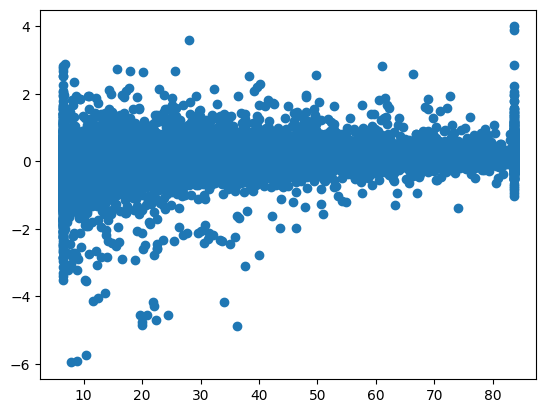

In [213]:
plt.scatter(opm, annual_stock_return)

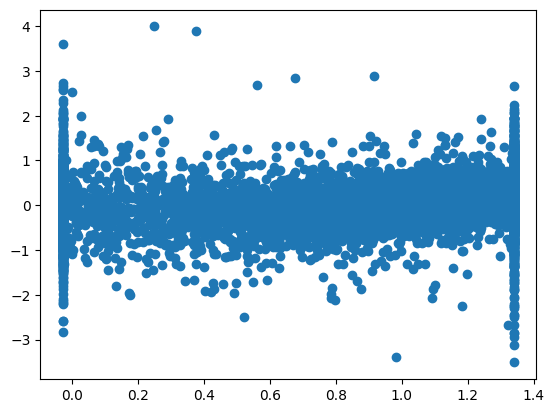

In [214]:
plt.scatter(rev, annual_stock_return)

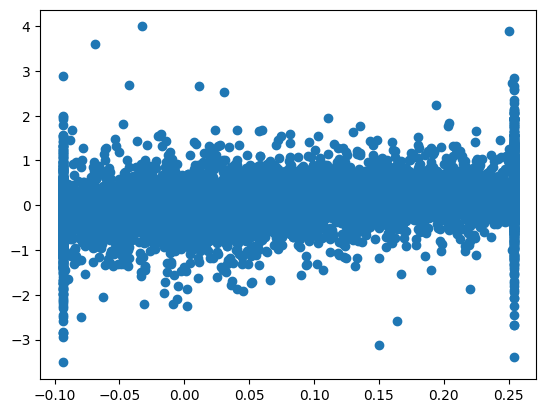

In [215]:
plt.scatter(mv, annual_stock_return)

Show descriptive statistics of these factors

In [216]:
opm.describe()

booktomarketratio
count       11519.000000
mean           37.283295
std            25.202457
min             6.447500
25%            16.420000
50%            31.500000
75%            53.705000
max            83.542000

In [217]:
rev.describe()

operatingprofitgrowth
count           10598.000000
mean                0.924310
std                 0.432958
min                -0.027186
25%                 0.763597
50%                 1.057102
75%                 1.284171
max                 1.339517

In [218]:
mv.describe()

salesannualgrowth
count       10598.000000
mean            0.072736
std             0.107312
min            -0.093719
25%            -0.004637
50%             0.063263
75%             0.146212
max             0.253906

Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

In [219]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing


In [220]:
def calculate_vif(df, features):    
    df = df.dropna()
    vif, tolerance = {}, {} 
    for feature in features:
        
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]  
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

First, a modeling was carried out taking into account the 3 variables used previously.

You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

- Multicollinearity is when 2 independent variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0 

If we calculate the vif to see if a variable has a VIF > 10 we see that there aren't any.

Now we make the regression with the independent variables that we define early.

We can see that the variable that has the most high p value is the net income, so we are going to drop that variable to improve the model.

In [221]:
import statsmodels.api as sm

y = only_industry['market_value']
x = only_industry[['booktomarketratio','salesannualgrowth', 'operatingprofitgrowth']]
x.replace([-np.inf, np.inf], np.nan, inplace=True)
x = sm.add_constant(x)

model = sm.OLS(y, x, missing="drop").fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     838.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:39:45   Log-Likelihood:            -2.5557e+05
No. Observations:               10490   AIC:                         5.111e+05
Df Residuals:                   10486   BIC:                         5.112e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.403e+

C:\Users\bobad\AppData\Local\Temp\ipykernel_26420\3843179904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace([-np.inf, np.inf], np.nan, inplace=True)


We can see that the value of R and R squared is 0.235, which means that the variable tends a bit to be significant. Since we know that what the variable wants to tell us is how close it is to the regression line. Basically, the more it is adjusted, the more it can be defined that it is a good model. Also when R squared has a value of 0.5, this would be perfect, but this doesn't happen much in real cases.

We can also see that the Log-likelihood value explains how well the data set fits the regression model. In this case we can see that it does not fit as well since the value is negative.

We know that the value of the Durbin Watson Test must be between the values ​​of 0 to 4. It should be noted that this test is responsible for indicating the residuals of the ordinary least squares. In our case it has a value of 0.207.

We can see that based on the standard error it tells us how close the sample is to the chosen population. In our case the standard error is not so low but it has a significant value.

In [222]:
calculate_vif(df=x, features=['booktomarketratio','salesannualgrowth', 'operatingprofitgrowth'])

VIF  Tolerance
booktomarketratio      1.000002   0.999998
salesannualgrowth      1.000034   0.999966
operatingprofitgrowth  1.000036   0.999964

We can see that the 3 variables have a VIF value minor than 10, so we dont need to drop any variable.